此程旨在練習文字探勘的簡單機器學習，目標是分析對電影的評論，預測什麼字是正向用詞、什麼是負向用詞，並且分別使用K-Means及RandomForest測試誰的精準度高，主觀猜測RandomForest應該比K-Means精準度高

以下為資料的前處理，包括把特定不需要的字元拿掉、轉小寫、還原成原形動詞......

In [5]:
# Import librarys(some parts of nltk is too old, if want to download now may deal with some problems)
import numpy as np
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords

# This dataset is downloaded from opensource
movie_data = load_files(r"txt_sentoken")  
X, y = movie_data.data, movie_data.target


documents = []

for sen in range(0, len(X)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()
    from nltk.stem import WordNetLemmatizer
    stemmer = WordNetLemmatizer()
    
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)
    

 

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


K-means
進行10次training，觀察K-means本身取點數差異對精準度的影響（取點數方法按照一般建議）

311
312
313
314
315
316
317
318
319
320


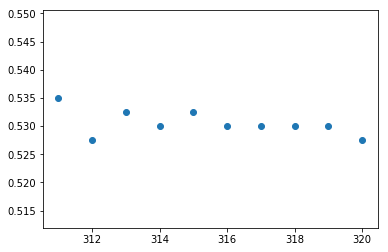

1
fin


In [6]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(documents).toarray()  

#Term frequency = (Number of Occurrences of a word)/(Total words in the document)  
#IDF(word) = Log((Total number of documents)/(Number of documents containing the word))  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn import metrics
from sklearn import neighbors
import matplotlib.pyplot as plt
arange = np.arange(round(0.2 * X_train.shape[0]) - 9, round(0.2 * X_train.shape[0]) + 1)
accuracies = []
for i in arange:
    print(i)
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    iris_clf = clf.fit(X_train, y_train)
    y_test_predicted = iris_clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    accuracies.append(accuracy)

# 視覺化
plt.scatter(arange, accuracies)
plt.show()
appr_k = accuracies.index(max(accuracies)) + 1
print(appr_k)
print("fin")

RandomForest

In [4]:
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[158  50]
 [ 99  93]]
             precision    recall  f1-score   support

          0       0.61      0.76      0.68       208
          1       0.65      0.48      0.56       192

avg / total       0.63      0.63      0.62       400

0.6275


結論
1. RandomForest(0.6275)在這個情況下比K-means大約在0.53的精準度高
2. K-means在取了一定數量的點後，取越多點精準度越低
3. 簡單未調整過的機器學習精準度並不高，個人認為6成不足以有足夠的代表性